### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

Anche in questo caso andare a rivedere la lezione teorica per capire quanto serve far crescere la rete per fittare queste ondine. Cerchiamo la rete ottimale e mostriamo questa (ad esempio le predizioni che fa).

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

/tmp/ipykernel_291966/3825142550.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


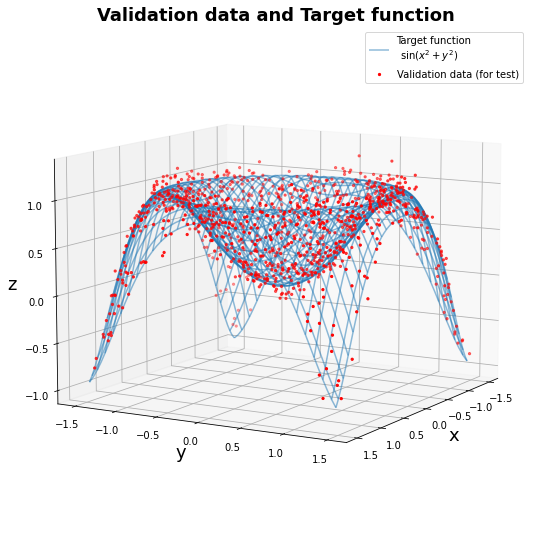

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri
N_epochs = 50
N_train = 3000 # <<< train
N_valid = 1000 # <<< test
Sigma = 0.1

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
lim = 3./2.
x_train = np.random.uniform(-lim, lim, N_train)    # training inputs
x_valid = np.random.uniform(-lim, lim, N_valid)    # ...

y_train = np.random.uniform(-lim, lim, N_train)    # training inputs
y_valid = np.random.uniform(-lim, lim, N_valid)    # ...

XY_train = np.column_stack((x_train,y_train))      # in the format needed
XY_valid = np.column_stack((x_valid,y_valid))      #   by `model.fit` method

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

z_target = f(x_valid, y_valid)                     # target polinomial function

sigma = Sigma                                      # noise standard deviation
z_train = np.random.normal(f(x_train,y_train), sigma) 
                                                   # array of measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid,y_valid), sigma)
                                                   # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-lim,lim, 0.05)
y_surf = np.arange(-lim,lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
#ax.scatter(x_valid, y_valid, z_target, label = "Target function\n $\sin(x^2+y^2)$")
ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function", fontsize = 18, fontweight = "bold")
ax.legend()
ax.view_init(10, 30)

plt.show()


In [60]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# Many neurons are needed to make the fitting job
# and activation functions need to be specifief.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# activation: relu-si, elu-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no, exponential-no
act = 'relu'
model.add(Dense(40, input_shape=(2,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(20, activation = act))
model.add(Dense(10, activation = act))
model.add(Dense(5, activation = act))
model.add(Dense(1, activation = act))

# compile the model choosing optimizer, loss and metrics objects
# optimizers: sgd-sì, rmsprop-sì, adam-?, adadelta-sì, adagrad-?, adamax-ni, nadam-sì, ftrl-no
opt = 'rmsprop'
# loss functios: mse-sì, mae-nì, msle-ni, logcosh-ni, kld-no(molto strana)
lf = 'mse'
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=XY_train, y=z_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(XY_valid, z_valid))

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 40)                120       
                                                                 
 dense_66 (Dense)            (None, 20)                820       
                                                                 
 dense_67 (Dense)            (None, 10)                210       
                                                                 
 dense_68 (Dense)            (None, 5)                 55        
                                                                 
 dense_69 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,211
Trainable params: 1,211
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
94/94 [==============================] -

TEST DATA evaluation
Test loss:      0.02435752935707569
Test accuracy:  0.02435752935707569

EXACT CURVE evaluation
Test loss:      0.016723498702049255
Test accuracy:  0.016723498702049255


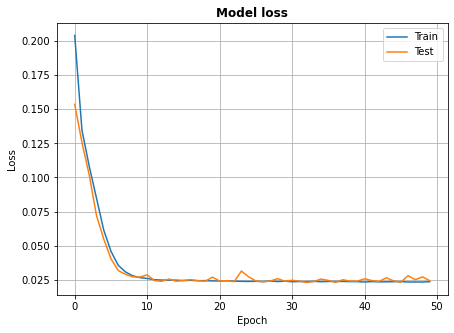

/tmp/ipykernel_291966/2446398508.py:79: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


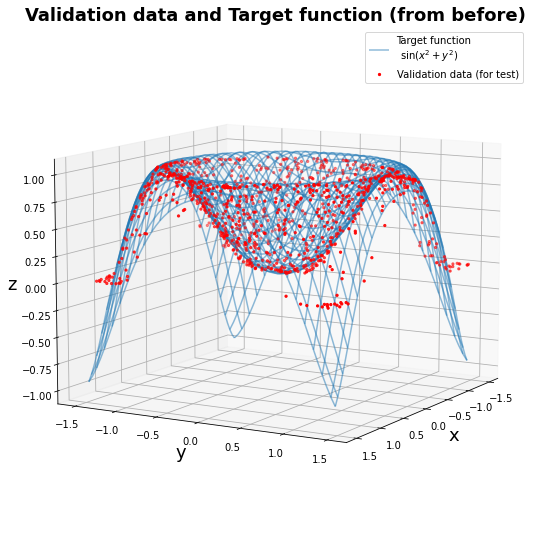

In [61]:
# ==============================================
# Return Weights and Biases
# ==============================================

# print("Guessed parameters")
# w = model.get_weights()
# print(w)

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(XY_valid, z_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(7,5))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")
plt.show()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-lim, lim, 1000) 
y_predicted = np.random.uniform(-lim, lim, 1000) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function (from before)", fontsize = 18, fontweight = "bold")
ax.legend()
ax.view_init(10, 30)


plt.show()